# 1) Matplotlib Styles

For this case study, we'll use the `fivethirtyeight` style to build this graph.

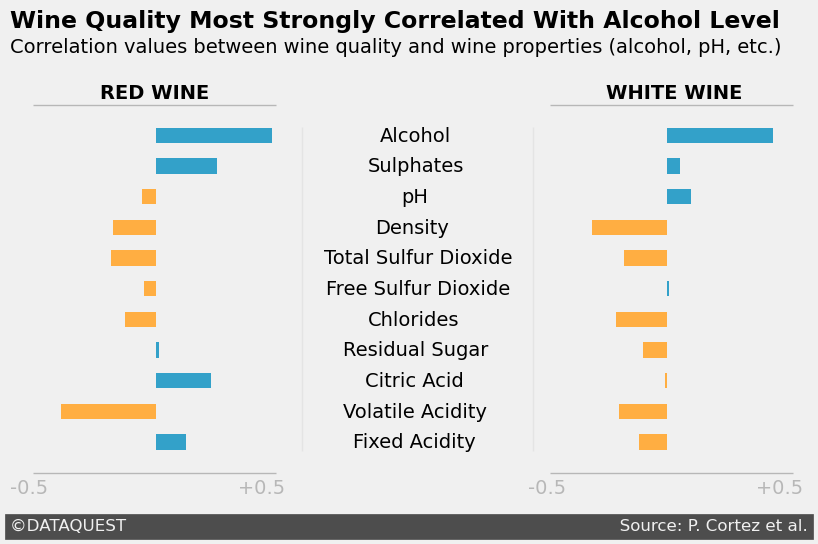

Matplotlib's pre-defined styles change the default visual properties of graphs. Below, we create a line plot using the `Solarize_Light2` style. To do that, we import the `matplotlib.style` submodule and then use the `style.use()` function.

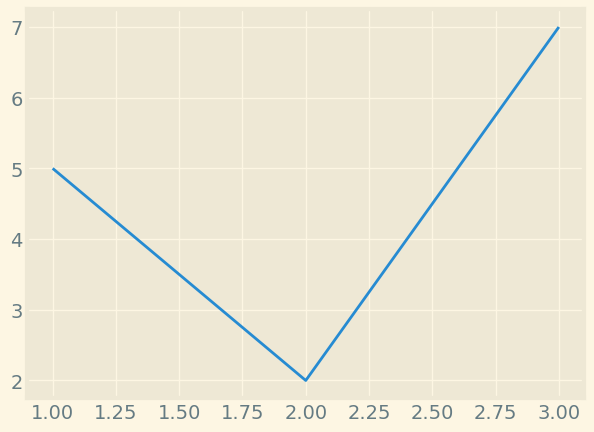

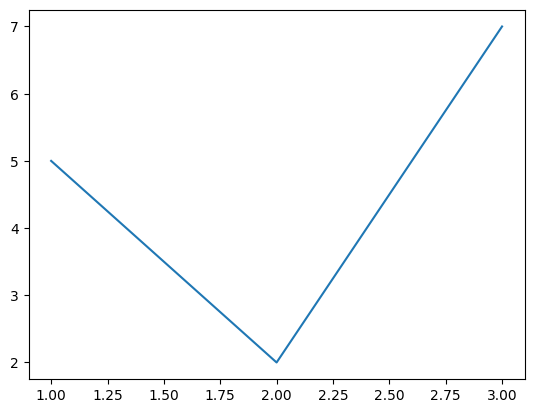

In [4]:
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use('Solarize_Light2')
plt.plot([1, 2, 3], [5, 2, 7])
plt.show()

#back to default style
style.use('default')
plt.plot([1, 2, 3], [5, 2, 7])
plt.show()

We can see all the available styles by accessing the `style.available` attribute.

If you want to switch between different styles, use `style.use('default')` **between** each change — some of the styles can interfere with one another.

In [7]:
print(style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## Instructions

1. Create a line plot using the `ggplot` style.

    * The x-coordinates are [2, 4, 6].
    * The y-coordinates are [10, 15, 5].
    * Close and display the plot using p`lt.show()`.

1. Create a line plot using the `default` style.
    * The coordinates are the same as above.
    * Close and display the plot using plt.show().

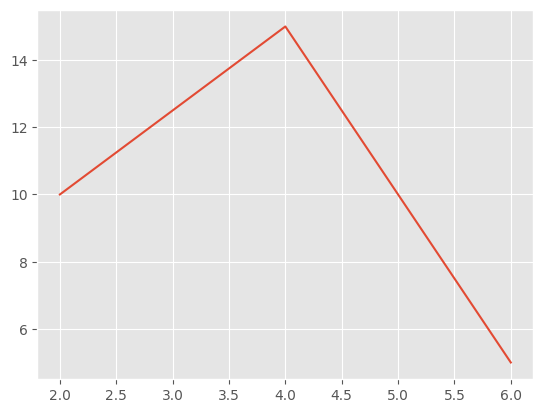

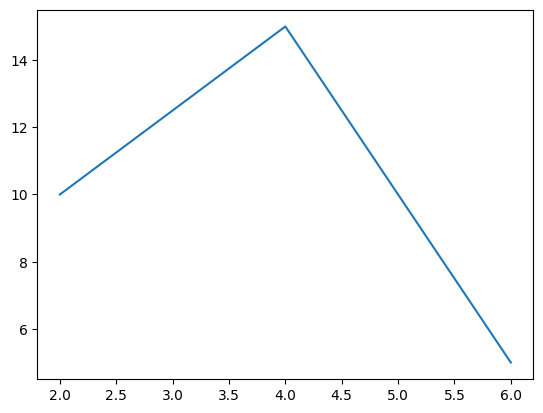

In [8]:
style.use('ggplot')
plt.plot([2, 4, 6], [10, 15, 5])
plt.show()

style.use('default')
plt.plot([2, 4, 6], [10, 15, 5])
plt.show()

# 2) Wine Quality Dataset

We're going to use a dataset on wine quality. Researchers P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. collected this data for their [research paper](https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377). We can find documentation and download the dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality).

The data comes in the form of two files:

* `winequality-red.csv:` data for red wine.
* `winequality-white.csv:` data for white wine.

Below, we see the first five rows of the `winequality-red.csv` file:

In [26]:
import pandas as pd
red_wine = pd.read_csv('winequality-red.csv', sep=';')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We want to determine which attributes (pH, alcohol level, etc.) most strongly correlate with wine `quality`. Below, we see the correlation values between quality and the other columns 

In [27]:
red_corr = red_wine.corr()['quality'][:-1]
print(red_corr)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


Red wine `quality` most strongly correlates with `alcohol` level and `volatile` acidity. If you're curious, you can find information on the Internet on each wine property. In this [article](https://extension.psu.edu/volatile-acidity-in-wine), for instance, we see that volatile acidity contributes to the smell and taste of vinegar in wine.

Let's now calculate correlations for the white wine dataset.

## Instructions

1. Read in the `winequality-white.csv` file into a pandas DataFrame.
    * Use `sep=';'` to properly read the file.
    * Assign the result to `white_wine`.

1. Calculate the correlation between `quality` and the other columns of `white_wine`.
    * The result should be a pandas Series with the same structure as the Series resulted from `red_wine.corr()['quality'][:-1]`.
    * Assign the correlation values to `white_corr`.

1. Examine the correlation values — what are the strongest two correlations? How does this compare to the red wine values?


In [22]:
import pandas as pd
white_wine = pd.read_csv('winequality-white.csv', sep=';')
white_wine.head()

white_corr = white_wine.corr()['quality'][:-1]

white_corr


fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64

# 3) FiveThirtyEight Style

Previously, we calculated the correlation values between wine quality and wine properties. We want to represent these values visually in the form of two `bar plots`. Below, you can see what we want to build.

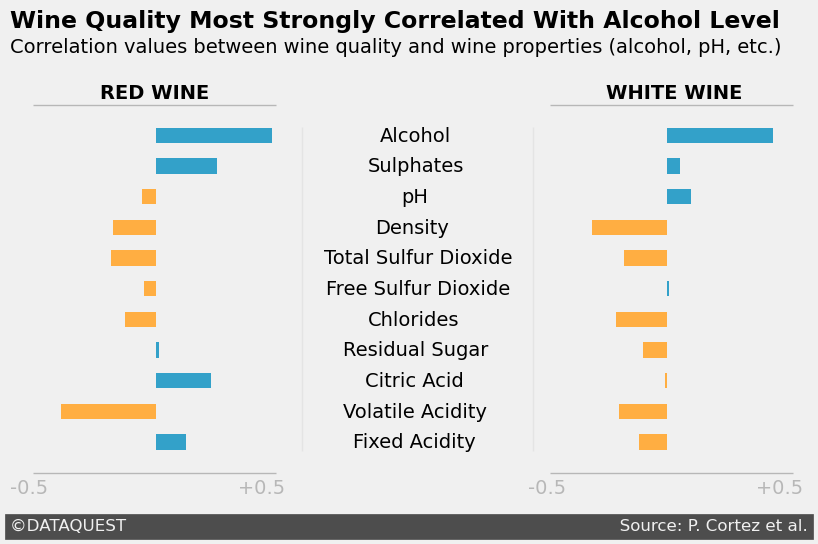

Let's start by creating the two bar plots using the `fivethirtyeight` style.

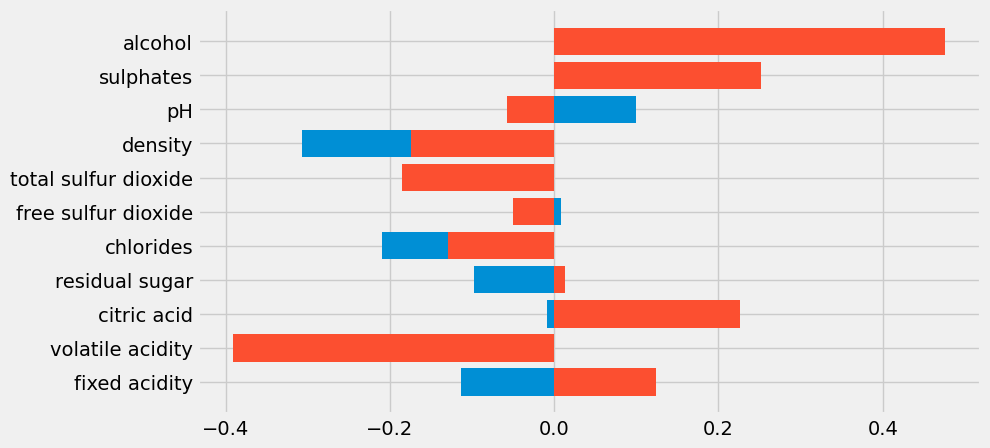

In [28]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr)
ax.barh(red_corr.index, red_corr)
plt.show()

We can tell from the two colors that Matplotlib built **two different bar plots**. It's not clear which is which, though.

To separate them, we're going to move the **white wine plot** to the **right side** of the graph. To do that, we can use the `left` parameter of the `Axes.barh()` method.

This parameter moves the left sides of the bars from their default x-coordinate of `0`. In our case, `left=2` moves them from 0 to 2 (for bars representing negative quantities, the right sides move from 0 to 2).

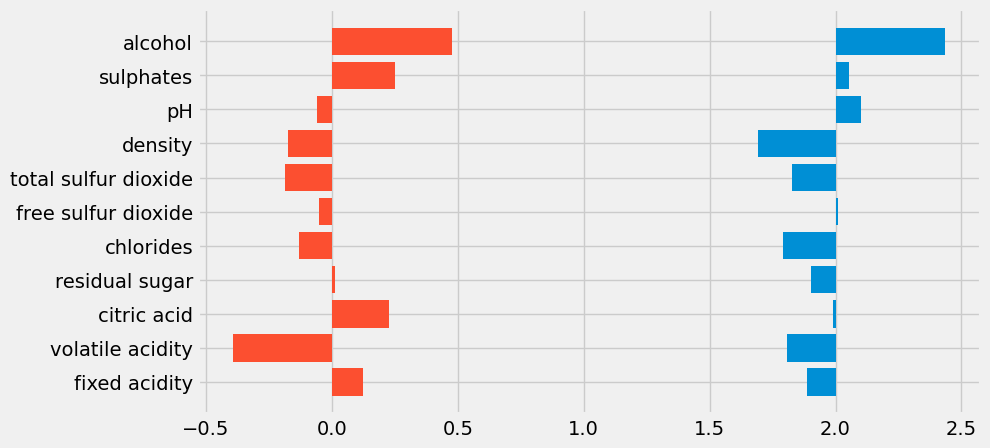

In [35]:
# Assume the other code is written
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr, left=2)
ax.barh(red_corr.index, red_corr)
plt.show()

Based on the principle of **proximity**, we now see two different bar plots: the **red wine** plot on the `left` (red-colored), and the **white wine** plot on the `right` (blue-colored).

To maximize the data-ink ratio, let's now erase the following:

* Non-data ink
* Redundant data ink